In [1]:
# Dependencies and Setup
import pandas as pd
from collections import Counter

# File to Load (Remember to Change These)
school_data_to_load = "Resources/schools_complete.csv"
student_data_to_load = "Resources/students_complete.csv"

# Read School and Student Data File and store into Pandas DataFrames
school_data = pd.read_csv(school_data_to_load)
student_data = pd.read_csv(student_data_to_load)

# Combine the data into a single dataset.  
school_data_complete = pd.merge(student_data, school_data, how="left", on=["school_name", "school_name"])

# Data Preparation

In [2]:
# Creating passing grade and column conditional number functions
def pass70(x):
    return x[x>=70].count()/len(x)*100
def num_colCond (column, cond):
    return school_data_complete[column].str.contains(cond).sum()

# Cleaning data 
school_data_complete['grade'] = school_data_complete['grade'].map(lambda x: int(x.replace('th','')))
school_data_complete['school_name'] = school_data_complete['school_name'].map(str.upper)
del school_data_complete['Student ID']

# Creating boolean column for passing both tests
school_data_complete["both_pass"] = (school_data_complete['math_score']>=70)&(school_data_complete['reading_score']>=70)
pass_mask = school_data_complete['both_pass']==True

# Set new index to school_name and assign data to the new DataFrame: df
df = school_data_complete.set_index("school_name",drop=True)

pd.set_option('display.max_colwidth', 30)
pd.options.display.float_format = '{:,.2f}'.format

* Global and general variables description

In [3]:
global schools_list, grades_list
schools_list = school_data_complete.school_name.unique()
schools_number =len(schools_list)
grades_list = sorted(school_data_complete.grade.unique())
unique_stud = len(school_data_complete.student_name.unique())
tot_stud = len(school_data_complete)
tot_budget = school_data_complete.budget.unique().sum()

# School Summary

In [4]:
# Creating grades_df (data frame of student average scores and pass results)
pass_grades_df = school_data_complete.groupby(df.index)[['math_score', 'reading_score']].agg(pass70).add_suffix("_%pass")
mean_grades_df = school_data_complete.groupby(df.index)[['math_score', 'reading_score']].mean().add_suffix("_avg")
grades_df = mean_grades_df.merge(pass_grades_df, left_index=True, right_index=True)

# Creating summary data across schools
tot_stud_df = school_data_complete.groupby(df.index)['size'].count()
tot_budget_df = school_data_complete.groupby(df.index)['budget'].sum()/tot_stud_df
tot_size_df = school_data_complete.groupby(df.index)['size'].sum()/tot_stud_df
overall_pass = school_data_complete[pass_mask].groupby('school_name')['both_pass'].count()/tot_stud_df*100

#Converting list of unique type school names into a flat list school_type 
school_type = school_data_complete.groupby(df.index)['type'].unique()
school_type = [ item for elem in school_type for item in elem]

# Creating total_df (data frame with summary data)
df_data = [*zip(school_type, tot_stud_df, tot_budget_df, tot_budget_df/tot_stud_df, overall_pass)]
col_list = ["School Type", "Tot Students", "Tot School Budget", "Per Student Budget", "% Overall Passing"]
total_df = pd.DataFrame(df_data, columns = col_list)

# Creating sum_df (merged data frame of total_df and grades_df)
sum_df = pd.merge(total_df, grades_df, on=grades_df.index).set_index(grades_df.index)
del sum_df['key_0']
sum_df.rename(columns={'math_score_avg': 'Average Math Score', 'reading_score_avg': 'Average Read Score',
                      'math_score_%pass':'% Pass Math', 'reading_score_%pass': '% Pass Read'}, inplace=True)

In [5]:
sum_df

,School Type,Tot Students,Tot School Budget,Per Student Budget,% Overall Passing,Average Math Score,Average Read Score,% Pass Math,% Pass Read
school_name,,,,,,,,,
BAILEY HIGH SCHOOL,District,4976,"3,124,928.00",628.00,54.64,77.05,81.03,66.68,81.93
CABRERA HIGH SCHOOL,Charter,1858,"1,081,356.00",582.00,91.33,83.06,83.98,94.13,97.04
FIGUEROA HIGH SCHOOL,District,2949,"1,884,411.00",639.00,53.20,76.71,81.16,65.99,80.74
FORD HIGH SCHOOL,District,2739,"1,763,916.00",644.00,54.29,77.10,80.75,68.31,79.30
GRIFFIN HIGH SCHOOL,Charter,1468,"917,500.00",625.00,90.60,83.35,83.82,93.39,97.14
HERNANDEZ HIGH SCHOOL,District,4635,"3,022,020.00",652.00,53.53,77.29,80.93,66.75,80.86
HOLDEN HIGH SCHOOL,Charter,427,"248,087.00",581.00,89.23,83.80,83.81,92.51,96.25
HUANG HIGH SCHOOL,District,2917,"1,910,635.00",655.00,53.51,76.63,81.18,65.68,81.32
JOHNSON HIGH SCHOOL,District,4761,"3,094,650.00",650.00,53.54,77.07,80.97,66.06,81.22


# District Summary

In [6]:
# Creating district summary data frame district_df 
header_list = sum_df.columns.values
math_avg = school_data_complete['math_score'].mean()
math_pass = pass70(school_data_complete['math_score'])
read_avg = school_data_complete['reading_score'].mean() 
read_pass = pass70(school_data_complete['reading_score'])
both_pass = len(school_data_complete[pass_mask])/tot_stud*100
district_data = [schools_number, "{0:,}".format(tot_stud), "${:,.2f}".format(tot_budget), "${:,.2f}".format(tot_budget/tot_stud),
                 both_pass, math_avg, read_avg, math_pass, read_pass]
district_df = pd.DataFrame(columns = header_list)
district_df.loc[0] = district_data

border = "#"*128
pd.set_option('display.max_colwidth', 20)
pd.options.display.float_format = '{:,.2f}'.format
print("\nDistrict Summary\n{}\nTotal budget: ${:,}\nTotal number of schools: {}".format(border, tot_budget, schools_number))
print("Total number of students: by school records - {:,}, by unique name - {:,}\n{}".format(tot_stud, unique_stud, border))
district_df.rename(columns={'School Type': 'Tot Schools'}, inplace=True)
district_df


District Summary
################################################################################################################################
Total budget: $24,649,428
Total number of schools: 15
Total number of students: by school records - 39,170, by unique name - 32,715
################################################################################################################################


,Tot Schools,Tot Students,Tot School Budget,Per Student Budget,% Overall Passing,Average Math Score,Average Read Score,% Pass Math,% Pass Read
0,15,"39,170","$24,649,428.00",$629.29,65.17,78.99,81.88,74.98,85.81


## Top Performing Schools (By % Overall Passing)

* Sort and display the top five performing schools by % overall passing.

In [7]:
sum_df.sort_values('% Overall Passing', ascending = False).head()

,School Type,Tot Students,Tot School Budget,Per Student Budget,% Overall Passing,Average Math Score,Average Read Score,% Pass Math,% Pass Read
school_name,,,,,,,,,
CABRERA HIGH SCHOOL,Charter,1858,"1,081,356.00",582.00,91.33,83.06,83.98,94.13,97.04
THOMAS HIGH SCHOOL,Charter,1635,"1,043,130.00",638.00,90.95,83.42,83.85,93.27,97.31
GRIFFIN HIGH SCHOOL,Charter,1468,"917,500.00",625.00,90.60,83.35,83.82,93.39,97.14
WILSON HIGH SCHOOL,Charter,2283,"1,319,574.00",578.00,90.58,83.27,83.99,93.87,96.54
PENA HIGH SCHOOL,Charter,962,"585,858.00",609.00,90.54,83.84,84.04,94.59,95.95


## Bottom Performing Schools (By % Overall Passing)

* Sort and display the five worst-performing schools by % overall passing.

In [8]:
sum_df.sort_values('% Overall Passing', ascending = True).head()

,School Type,Tot Students,Tot School Budget,Per Student Budget,% Overall Passing,Average Math Score,Average Read Score,% Pass Math,% Pass Read
school_name,,,,,,,,,
RODRIGUEZ HIGH SCHOOL,District,3999,"2,547,363.00",637.00,52.99,76.84,80.74,66.37,80.22
FIGUEROA HIGH SCHOOL,District,2949,"1,884,411.00",639.00,53.20,76.71,81.16,65.99,80.74
HUANG HIGH SCHOOL,District,2917,"1,910,635.00",655.00,53.51,76.63,81.18,65.68,81.32
HERNANDEZ HIGH SCHOOL,District,4635,"3,022,020.00",652.00,53.53,77.29,80.93,66.75,80.86
JOHNSON HIGH SCHOOL,District,4761,"3,094,650.00",650.00,53.54,77.07,80.97,66.06,81.22


## Math and Reading Scores by Grade

  * Create a table that lists the average Math and Reading Score for students of each grade level (9th, 10th, 11th, 12th) at each school.

  * Create a pandas series for each grade. Hint: use a conditional statement.
  
  * Group each series by school
  
  * Combine the series into a dataframe
  
  * Optional: give the displayed data cleaner formatting

In [9]:
def grades_summary (df_grades, score):
    """Summary Analysis of a DataFrame over Grade Score
    Args:
        df_grades (DataFrame): Given DataFrame
        score (str):    Type of score for analysis
    Returns:
        df (DataFrame): Analysis output
    """
    df = pd.DataFrame()
    mean_list =[]
    for i in range(len(schools_list)):
        for j in range(len(grades_list)):
            group_df = df_grades.loc[df_grades["grade"]==grades_list[j]]
            mean_list.append(group_df.loc[group_df.index == schools_list[i],:][score].mean())
        df.insert(i, schools_list[i], mean_list)
        mean_list=[]
    df.insert(i+1, "school_name", grades_list)
    df = df.set_index("school_name").transpose().add_suffix("th")
    return df

In [10]:
num_stud_grades = [*Counter(df['grade']).values()]
print('\nReading and Math scores over grades summary:\nnumber of students per each grade [9th, 10th, 11th, 12th]:{}\n'.format(num_stud_grades))
read_sum = grades_summary(df, 'reading_score').add_suffix("_read").sort_index()
math_sum = grades_summary(df, 'math_score').add_suffix("_math").sort_index()
scores_sum = pd.concat([read_sum, math_sum], join='outer', axis=1)
scores_sum


Reading and Math scores over grades summary:
number os students per each grade [9th, 10th, 11th, 12th]:[11408, 7899, 9695, 10168]



school_name,9th_read,10th_read,11th_read,12th_read,9th_math,10th_math,11th_math,12th_math
BAILEY HIGH SCHOOL,81.30,80.91,80.95,80.91,77.08,77.00,77.52,76.49
CABRERA HIGH SCHOOL,83.68,84.25,83.79,84.29,83.09,83.15,82.77,83.28
FIGUEROA HIGH SCHOOL,81.20,81.41,80.64,81.38,76.40,76.54,76.88,77.15
FORD HIGH SCHOOL,80.63,81.26,80.40,80.66,77.36,77.67,76.92,76.18
GRIFFIN HIGH SCHOOL,83.37,83.71,84.29,84.01,82.04,84.23,83.84,83.36
HERNANDEZ HIGH SCHOOL,80.87,80.66,81.40,80.86,77.44,77.34,77.14,77.19
HOLDEN HIGH SCHOOL,83.68,83.32,83.82,84.70,83.79,83.43,85.00,82.86
HUANG HIGH SCHOOL,81.29,81.51,81.42,80.31,77.03,75.91,76.45,77.23
JOHNSON HIGH SCHOOL,81.26,80.77,80.62,81.23,77.19,76.69,77.49,76.86
PENA HIGH SCHOOL,83.81,83.61,84.34,84.59,83.63,83.37,84.33,84.12


## Scores by School Spending

* Create a table that breaks down school performances based on average Spending Ranges (Per Student). Use 4 reasonable bins to group school spending. Include in the table each of the following:
  * Average Math Score
  * Average Reading Score
  * % Passing Math
  * % Passing Reading
  * Overall Passing Rate (Average of the above two)

In [11]:
# Create the new data frame and the bins in which Data will be held
budget_df = sum_df.filter(['Per Student Budget', 'Average Math Score', 'Average Read Score',
                          '% Pass Math', '% Pass Read', '% Overall Passing'], axis=1)
group_names = ["<584", "585-629", "630-644", "645-675"]
budget_df["Spending Ranges"] = pd.cut(budget_df["Per Student Budget"], bins=[0, 585, 630, 645, 675], 
                                      right = False, labels=group_names)
# Creating a group based off of the bins
budget_df = budget_df.groupby("Spending Ranges").mean()
del budget_df['Per Student Budget']
budget_df

,Average Math Score,Average Read Score,% Pass Math,% Pass Read,% Overall Passing
Spending Ranges,,,,,
<584,83.46,83.93,93.46,96.61,90.37
585-629,81.90,83.16,87.13,92.72,81.42
630-644,78.52,81.62,73.48,84.39,62.86
645-675,77.00,81.03,66.16,81.13,53.53


## Scores by School Size

* Perform the same operations as above, based on school size.

In [12]:
# Create the new data frame and the bins in which Data will be held
size_df = sum_df.filter(['Tot Students', 'Average Math Score', 'Average Read Score',
                          '% Pass Math', '% Pass Read', '% Overall Passing'], axis=1)
group_names = ["<1000", "1000-2000", "2000-5000"]
size_df["School Size"] = pd.cut(size_df['Tot Students'], bins=[0, 1000, 2000, 5000], 
                                right=False, labels=group_names, include_lowest=True)
# Creating a group based off of the bins
size_df = size_df.groupby("School Size").mean()
del size_df['Tot Students']
size_df

,Average Math Score,Average Read Score,% Pass Math,% Pass Read,% Overall Passing
School Size,,,,,
<1000,83.82,83.93,93.55,96.10,89.88
1000-2000,83.37,83.86,93.60,96.79,90.62
2000-5000,77.75,81.34,69.96,82.77,58.29


## Scores by School Type (based on the full original data frame)

* Perform the same operations as above, based on school type

In [13]:
scores_mean = school_data_complete.groupby('type')[['math_score', 'reading_score']].mean()
scores_pass = school_data_complete.groupby('type')[['math_score', 'reading_score']].agg(pass70)

charter_mask = school_data_complete[school_data_complete['type']=='Charter']
district_mask = school_data_complete[school_data_complete['type']=='District']
type_num_stud = [len(charter_mask), len(district_mask)]
overall_pass = school_data_complete[pass_mask].groupby('type')['both_pass'].count()/type_num_stud*100

school_type_df = pd.concat([scores_mean, scores_pass, overall_pass], join='outer', axis=1)
school_type_df

,math_score,reading_score,math_score,reading_score,both_pass
type,,,,,
Charter,83.41,83.90,93.70,96.65,90.56
District,76.99,80.96,66.52,80.91,53.70


## Scores by School Type (based on the school summary data frame)

In [14]:
scores_mean = sum_df.groupby('School Type')[['Average Math Score', 'Average Read Score']].mean()
scores_pass = sum_df.groupby('School Type')[['% Pass Math','% Pass Read']].mean()
overall_pass = sum_df.groupby('School Type')['% Overall Passing'].mean()
school_type_df = pd.concat([scores_mean, scores_pass, overall_pass], join='outer', axis=1)
school_type_df

,Average Math Score,Average Read Score,% Pass Math,% Pass Read,% Overall Passing
School Type,,,,,
Charter,83.47,83.90,93.62,96.59,90.43
District,76.96,80.97,66.55,80.80,53.67


# Trends in Schools Performance

* Scores Distribution (Math vs Reading)
* Overall Performance (Charter vs District)
* Overall Performance (Large vs Small & Medium)
* Overall Performance (Female vs Male)


Trend 1: Overall performance in reading is better over math



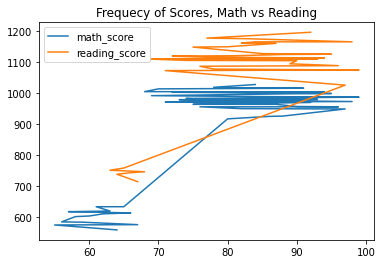

In [15]:
math = school_data_complete['math_score'].value_counts()
read = school_data_complete['reading_score'].value_counts()
math.plot(kind='line', title="Frequecy of Scores, Math vs Reading", legend = True)
read.plot(kind='line', legend = True)
print("\nTrend 1: Overall performance in reading is better over math\n")

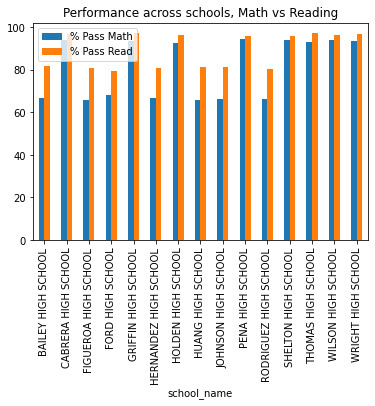

In [16]:
sum_df.loc[sum_df.index, ['% Pass Math','% Pass Read']].plot.bar(title="Performance across schools, Math vs Reading", rot=90)
print('\n')


Trend 2: Overall performance in Charter schools is 
better over District schools



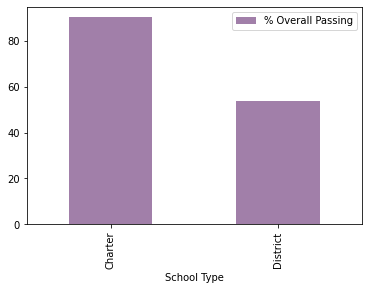

In [17]:
school_type_df['% Overall Passing'].plot.bar(alpha=0.5, colormap ='viridis', legend = True)
print("\nTrend 2: Overall performance in Charter schools is \nbetter over District schools\n")


Trend 3: Overall performance in small and medium size schools 
is better over large schools



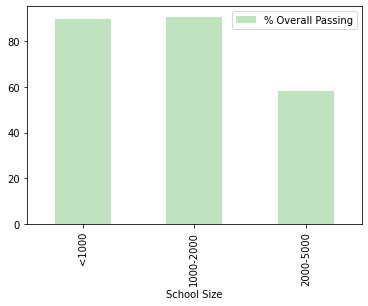

In [18]:
size_df['% Overall Passing'].plot.bar(alpha=0.5, colormap ='Accent', legend = True)
print("\nTrend 3: Overall performance in small and medium size schools \nis better over large schools\n")

In [19]:
# Creating gender summary data
male_num = num_colCond('gender', 'M')
female_num = num_colCond('gender', 'F')
male_df = school_data_complete[school_data_complete['gender']=='M']
female_df = school_data_complete[school_data_complete['gender']=='F']
male_pass = male_df[male_df['both_pass']==True].count()/male_num
female_pass = female_df[female_df['both_pass']==True].count()/female_num
male_pass['gender'], female_pass['gender']
scores_mean = school_data_complete.groupby('gender')[['math_score', 'reading_score']].mean()
scores_pass = school_data_complete.groupby('gender')[['math_score', 'reading_score']].agg(pass70)
gender_df = pd.concat([scores_mean, scores_pass], join='outer', axis=1)
gender_df['overall_pass'] = [female_pass['gender'], male_pass['gender']]
gender_df['tot_students(%)'] = [female_num/tot_stud*100, male_num/tot_stud*100]
gender_df
print("\nTrend 4: Overall performance among female students is better over male students\n")
gender_df


Trend 4: Overall performance among female students is better over male students



,math_score,reading_score,math_score,reading_score,overall_pass,tot_students(%)
gender,,,,,,
F,79.04,82.00,75.21,86.31,0.66,50.38
M,78.93,81.76,74.75,85.29,0.65,49.62
